<a href="https://colab.research.google.com/github/jacksonguedes/PIVIC/blob/main/PIVIC_Vers%C3%A3o1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Primeiro Passo - FFT e Reconstrução**  
Criando um sinal aleatório de tensão

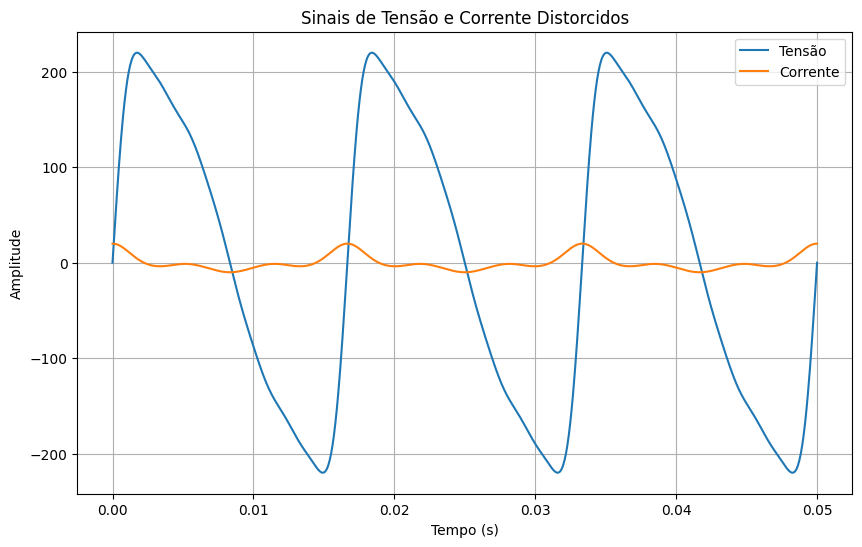

In [ ]:
n = 1000 # Frequência de amostragem
tx = 0.05  # Tempo
f_fundamental = 60

w_fundamental = 2 * np.pi * f_fundamental # Em radianos
t = np.linspace(0, tx, n)

# Sinal de Tensão
s_1 = np.sin(w_fundamental * t)
s_2 = 0.3 *    np.sin(2 * w_fundamental * t)
s_3 = 0.2 *    np.sin(3 * w_fundamental * t)
s_4 = 0.1 *    np.sin(4 * w_fundamental * t)
s_5 = 0.05 *   np.sin(5 * w_fundamental * t)
s_6 = 0.025 *  np.sin(6 * w_fundamental * t)
s_7 = 0.0125 * np.sin(7 * w_fundamental * t)
s_t = s_1 + s_2 + s_3 + s_4 + s_5 + s_6 + s_7 # Sinal Original Distorcido

# Sinal de Corrente

i_1 = np.cos(w_fundamental * t)
i_2 = 0.4 * np.cos(2 * w_fundamental * t)
i_3 = 0.6 * np.cos(3 * w_fundamental * t)
i_4 = 0.13 * np.cos(4 * w_fundamental * t)
i_5 = 0.05 * np.cos(5 * w_fundamental * t)
i_6 = 0.025 * np.cos(6 * w_fundamental * t)
i_7 = 0.0125 * np.cos(7 * w_fundamental * t)
i_t = i_1 + i_2 + i_3 + i_4 + i_5 + i_6 + i_7 # Sinal Original Distorcido

# Fazendo co que o pico seja 220
# Normaliza o sinal para que o pico seja 220
max_atual_tensao = np.max(np.abs(s_t))
novo_pico_tensao = 220
s_t_normalizado_tensao = (s_t / max_atual_tensao) * novo_pico_tensao

max_atual_corrente = np.max(np.abs(i_t))
novo_pico_corrente = 20
s_t_normalizado_corrente = (i_t / max_atual_corrente) * novo_pico_corrente

# Plota os sinais de tensão e corrente sobrepostos
plt.figure(figsize=(10, 6))

plt.plot(t, s_t_normalizado_tensao, label='Tensão')
plt.plot(t, s_t_normalizado_corrente, label='Corrente', linestyle='solid')

plt.title('Sinais de Tensão e Corrente Distorcidos')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Criando um vetor de Frequência e uma máscara

In [ ]:
freq = np.fft.fftfreq(n, d=tx/n) # Vetor de frequência
mascara = freq > 0 # Pegar valores positivos

Aplicando Fourier

In [ ]:
# Aplicando no sinal de tensão

fft_calculo_tensao = np.fft.fft(s_t_normalizado_tensao) # Cálculo da transformada de Fourier
fft_abs_tensao = 2*np.abs(fft_calculo_tensao/n) # FFT com valores absolutos
f_v = np.fft.ifft(fft_calculo_tensao) # Calculando a inversa de Fourier para o sinal de frequencia
angulo_tensao = np.angle(fft_calculo_tensao)

# Aplicando no sinal de corrente

fft_calculo_corrente = np.fft.fft(s_t_normalizado_corrente) # Cálculo da transformada de Fourier
fft_abs_corrente = np.abs(fft_calculo_corrente/n) # FFT com valores absolutos
f2 = np.fft.ifft(fft_calculo_corrente) # Calculando a inversa de Fourier para o sinal de frequencia
angulo_corrente = np.angle(fft_calculo_corrente)

Plotando o espectro de frequências do sinal de tensão distorcido. Ou seja, as harmônicas, ou componentes harmônicas, que compõe o sinal de tensão distorcido.

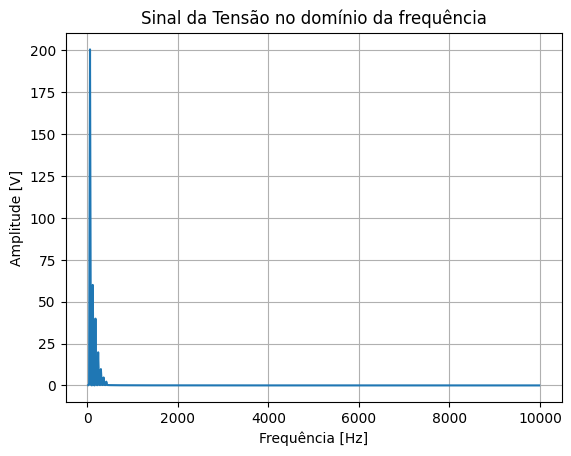

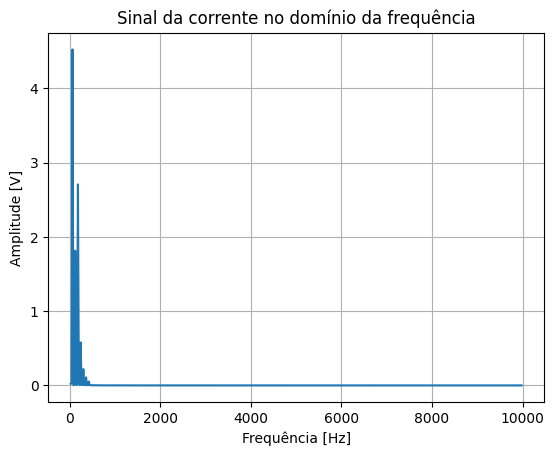

In [ ]:
plt.figure()
plt.title("Sinal da Tensão no domínio da frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude [V]")
plt.plot((freq[mascara]), fft_abs_tensao[mascara])
plt.grid(True)

plt.figure()
plt.title("Sinal da corrente no domínio da frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude [V]")
plt.plot((freq[mascara]), fft_abs_corrente[mascara])
plt.grid(True)


Reconstruindo o sinal de tensão a partir das componentes de frequência

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


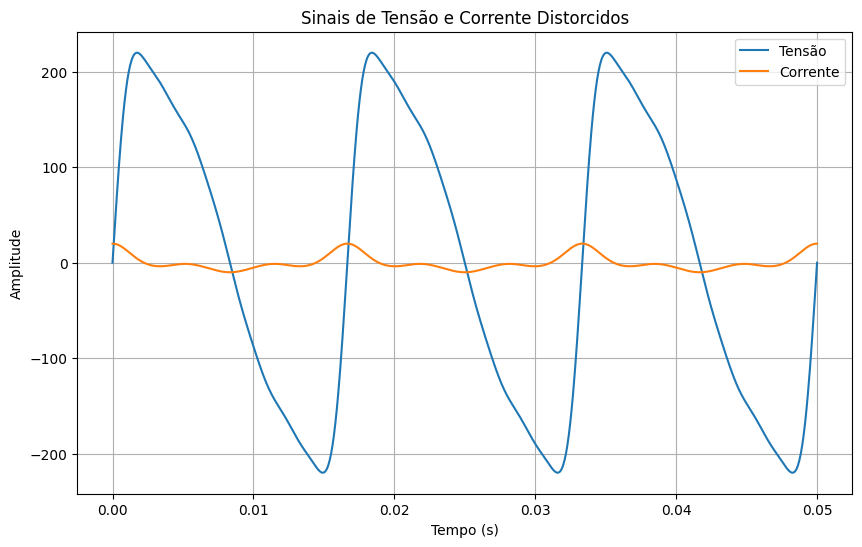

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(t, f_v, label='Tensão')
plt.plot(t, f2, label='Corrente', linestyle='solid')

plt.title('Sinais de Tensão e Corrente Distorcidos')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# **Comparando os dois sinais, original e a reconstrução.**

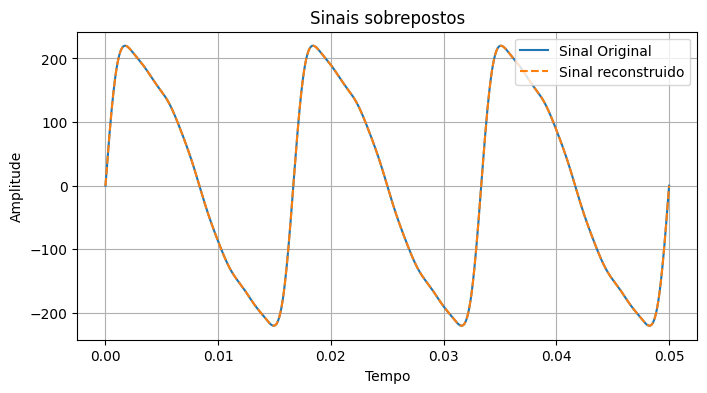

In [ ]:
# Plotar os sinais
plt.figure(figsize=(8, 4))
plt.plot(t, s_t_normalizado_tensao, label='Sinal Original')
plt.plot(t, f_v, label='Sinal reconstruido', linestyle='--')

# Adicionar legendas e rótulos aos eixos
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinais sobrepostos')

# Mostrar o gráfico
plt.legend(loc='upper right')
plt.grid()
plt.show()

# **Segundo Passo - Calcular o fator de potência utilizando a norma IEEE**

Essa parte do código separa em vetores os valores de frequência, módulo e ângulo para o cálculo da Distorção Harmônica Total do sinal de tensão

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_tensao = np.degrees(angulo_tensao)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_tensao = []
modulos_salvos_tensao = []
angulos_salvos_tensao = []
frequencias_multiplos_60_tensao = []
modulos_multiplos_60_tensao = []
angulos_multiplos_60_tensao = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da tensão\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_tensao, mod_tensao, ang_graus_tensao in zip(freq[mascara], fft_abs_tensao[mascara], angulo_graus_tensao[mascara]):
  if (f_tensao < 500) and (mod_tensao > 5):
    print(f"{f_tensao:.2f}\t\t\t{mod_tensao:.2f}\t\t\t{ang_graus_tensao:.2f}°")
    frequencias_salvas_tensao.append(f_tensao)
    modulos_salvos_tensao.append(mod_tensao)
    angulos_salvos_tensao.append(ang_graus_tensao)
    if (f_tensao % 60 == 0):
          frequencias_multiplos_60_tensao.append(f_tensao)
          modulos_multiplos_60_tensao.append(mod_tensao)
          angulos_multiplos_60_tensao.append(ang_graus_tensao)

Valores do espectro da tensão

Frequência (Hz)		Módulo (v)			Ângulo (graus)

58.00			5.82			-79.56°
59.00			11.31			-79.38°
60.00			199.43			-79.20°
61.00			12.72			100.98°
62.00			6.15			101.16°
119.00			6.11			-68.58°
120.00			58.58			-68.40°
121.00			8.20			111.78°
179.00			5.55			-57.78°
180.00			37.76			-57.60°
181.00			8.60			122.58°
240.00			17.90			-46.80°
241.00			6.06			133.38°
300.00			8.29			-36.00°


In [ ]:
# Posições do módulo da tensão multiplas.
for valor in enumerate(modulos_salvos_tensao):
  print(valor)

(0, 5.82059710424191)
(1, 11.308610399117065)
(2, 199.425597804676)
(3, 12.723938136969704)
(4, 6.151891520647146)
(5, 6.111149793544751)
(6, 58.57743981847535)
(7, 8.200183384998555)
(8, 5.54942985942981)
(9, 37.76210930291038)
(10, 8.59906615590185)
(11, 17.900533056197677)
(12, 6.062598432127704)
(13, 8.292300505826178)


In [ ]:
# Convertendo os ângulos para graus
angulo_graus_corrente = np.degrees(angulo_corrente)

# Listas para salvar os valores de frequência, módulo e ângulo para CORRENTE.
frequencias_salvas_corrente = []
modulos_salvos_corrente = []
angulos_salvos_corrente = []
frequencias_multiplos_60_corrente = []
modulos_multiplos_60_corrente = []
angulos_multiplos_60_corrente = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente\n")
print("Frequência (Hz)\t\tMódulo (A)\t\t\tÂngulo (graus)\n")
for f_corrente, mod_corrente, ang_graus_corrente in zip(freq[mascara], fft_abs_corrente[mascara], angulo_graus_corrente[mascara]):
  if (f_corrente <= 500) and (mod_corrente >= 0.1):
    print(f"{f_corrente:.2f}\t\t\t{mod_corrente:.2f}\t\t\t{ang_graus_corrente:.2f}°")
    frequencias_salvas_corrente.append(f_corrente)
    modulos_salvos_corrente.append(mod_corrente)
    angulos_salvos_corrente.append(ang_graus_corrente)
    if (f_corrente % 60 == 0):
          frequencias_multiplos_60_corrente.append(f_corrente)
          modulos_multiplos_60_corrente.append(mod_corrente)
          angulos_multiplos_60_corrente.append(ang_graus_corrente)

Valores do espectro da corrente

Frequência (Hz)		Módulo (A)			Ângulo (graus)

57.00			0.10			10.26°
58.00			0.15			10.44°
59.00			0.27			10.62°
60.00			4.50			10.80°
61.00			0.27			-169.02°
62.00			0.12			-168.84°
118.00			0.11			21.24°
119.00			0.20			21.42°
120.00			1.77			21.60°
121.00			0.23			-158.22°
122.00			0.10			-158.04°
176.00			0.11			31.68°
177.00			0.15			31.86°
178.00			0.21			32.04°
179.00			0.39			32.22°
180.00			2.57			32.40°
181.00			0.56			-147.42°
182.00			0.25			-147.24°
183.00			0.16			-147.06°
184.00			0.12			-146.88°
240.00			0.53			43.20°
241.00			0.17			-136.62°
300.00			0.19			54.00°


In [ ]:
# Posições do módulo da corrente multiplas de 60 Hz
for valor in enumerate(modulos_salvos_corrente):
  print(valor)

(0, 0.1030066179587601)
(1, 0.14577061857941373)
(2, 0.2691182796557319)
(3, 4.498062921430502)
(4, 0.2711924201928328)
(5, 0.12346995503734023)
(6, 0.10938291057222653)
(7, 0.19866629549961462)
(8, 1.7713032000250901)
(9, 0.23027744291603663)
(10, 0.10216888534927318)
(11, 0.11152251697251189)
(12, 0.14638033761936903)
(13, 0.21311096284981354)
(14, 0.3927384651466943)
(15, 2.565017411512447)
(16, 0.5618465542427359)
(17, 0.25213903608780874)
(18, 0.16202141876940185)
(19, 0.11903309053982325)
(20, 0.5263806793687035)
(21, 0.17387915474942922)
(22, 0.18946080060302262)


## **Calculando as Distorções Harmônicas Total do sinal de tensão**

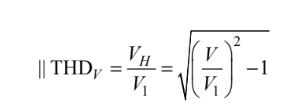

Transformando as listas em array

In [ ]:
# Vetores com os valores múltiplos de 60 Hz - 60, 120, 180, 240...
# E seus correspondentes valores de módulo

frequencias_multiplos_60_tensao_array = np.array(frequencias_multiplos_60_tensao)
modulos_multiplos_60_tensao_array = np.array(modulos_multiplos_60_tensao)

Calculando o THDv - Distorção Harmônica Total do sinal de tensão

In [ ]:
soma_v = 0
for i in modulos_multiplos_60_tensao_array:
    soma_v = soma_v + (i / modulos_multiplos_60_tensao_array[0])**2

soma_v = soma_v - 1
THD_v = np.sqrt(soma_v)

print(f"O valor da Distorção Harmônica da tensão (THDv) é: {THD_v * 100:.2f} %")

O valor da Distorção Harmônica da tensão (THDv) é: 36.32 %


## **Calculando a Distorção Harmônica Total do sinal de corrente**

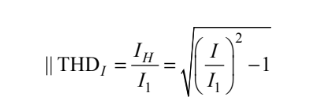

Transformando as listas em array

In [ ]:
# Vetores com os valores múltiplos de 60 Hz - 60, 120, 180, 240...
# E seus correspondentes valores de módulo

frequencias_multiplos_60_corrente_array = np.array(frequencias_multiplos_60_corrente)
modulos_multiplos_60_corrente_array = np.array(modulos_multiplos_60_corrente)

Calculando o THDv - Distorção Harmônica Total do sinal de tensão

In [ ]:
soma_i = 0
for i in modulos_multiplos_60_corrente_array:
    soma_i = soma_i + (i / modulos_multiplos_60_corrente_array[0])**2

soma_i = soma_i - 1
THD_i = np.sqrt(soma_i)

print(f"O valor da Distorção Harmônica da corrente (THDi) é: {THD_i * 100:.2f} %")

O valor da Distorção Harmônica da corrente (THDi) é: 70.41 %


## **Potência Ativa Não Fundamental**

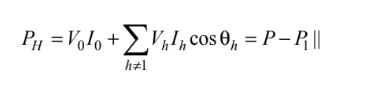

In [ ]:
# Calculando potência para 60 Hz

P_o = modulos_salvos_corrente[0] * modulos_salvos_tensao[0]
P_o

0.5995600222085117

In [ ]:
# Somatório das harmônicas
soma_harmonic = 0
for f_h, v_h, i_h, angulo_tensao_h, angulo_corrente_h  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_corrente, angulos_salvos_tensao, angulos_salvos_corrente):
  if f_h != 60: # Somatório das harmônicas sem a frequência de 60 Hz
    soma_harmonic = soma_harmonic + v_h * i_h * np.cos(angulo_tensao_h - angulo_corrente_h)
soma_harmonic

-33.515565648024754

In [ ]:
# Calculando Potência não Fundamental
P_H = P_o + soma_harmonic
P_H

-32.91600562581624

## **Fator de Potência Fundamental - 60 Hz**

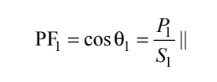

In [ ]:
# Calculando o fator de potencia fundamental
FP_1 = np.cos(angulos_multiplos_60_tensao[0] - angulos_multiplos_60_corrente[0])
FP_1

-0.4480736161292337

# **Potência Ativa Fundamental**

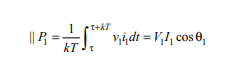

In [ ]:
P_1 = modulos_multiplos_60_tensao[0] * modulos_multiplos_60_corrente[0] * np.cos(angulos_multiplos_60_tensao[0] - angulos_multiplos_60_corrente[0])
P_1

-401.93497720153454

# **Potência Ativa**

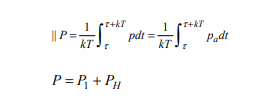

In [ ]:
P_Ativa = P_1 + P_H

In [ ]:
print(f'O potência ativa é: {P_Ativa}')

O potência ativa é: -434.8509828273508


## **Fator de Potência**

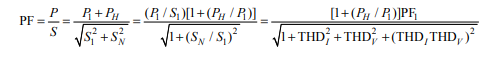

In [ ]:
FP = ((1 + (P_H/P_1)) * FP_1) / np.sqrt(1 + np.square(THD_i) + np.square(THD_v) + np.square(THD_i * THD_v))

In [ ]:
print(f'O fator de potência é: {FP}')

O fator de potência é: -0.37256361885643535
